In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [113]:
file_path = '/content/drive/MyDrive/data_train-2.csv'

# Read the CSV file using pandas
df = pd.read_csv(file_path, index_col=0)

print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         109        331          116                  5  5.0   5.0  9.38   
1         346        316           98                  1  1.5   2.0  7.43   
2          99        332          119                  4  5.0   4.5  9.24   
3         210        301          104                  3  3.5   4.0  8.12   
4         242        317          103                  2  2.5   2.0  8.15   

   Research  Chance of Admit   
0         1              0.93  
1         0              0.49  
2         1              0.90  
3         1              0.68  
4         0              0.65  


In [114]:
# Drop Chance of Admit as it is the label and Serial No. as it is just the ID and doesn't contribute in determining Chance of Admit
columns_to_drop = ['Serial No.', 'Chance of Admit ']
features = df.drop(columns=columns_to_drop)
print('Features - ')
print(features.head())
print()
print()
# Create Label Data frame with Chance of Admit
labels = df['Chance of Admit ']
# Calculate the median of Chance of Admit
median = labels.median()
# Convert the values greater than median to 1, otherwise 0
labels = (labels > median).astype(int)
print('Labels - ')
print(labels.head())

Features - 
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        331          116                  5  5.0   5.0  9.38         1
1        316           98                  1  1.5   2.0  7.43         0
2        332          119                  4  5.0   4.5  9.24         1
3        301          104                  3  3.5   4.0  8.12         1
4        317          103                  2  2.5   2.0  8.15         0


Labels - 
0    1
1    0
2    1
3    0
4    0
Name: Chance of Admit , dtype: int64


In [115]:
# Split the Training set to get training data set and validation data set
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [116]:
# 1. Linear kernel SVM
svm_linear = svm.SVC(kernel='linear')

# 2. RBF kernel SVM
svm_rbf = svm.SVC(kernel='rbf')

# 3. Polynomial (degree 3) kernel SVM
svm_poly = svm.SVC(kernel='poly', degree=3)

In [117]:
# Normalize the training and validation data
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_val_n = scaler.transform(X_val)

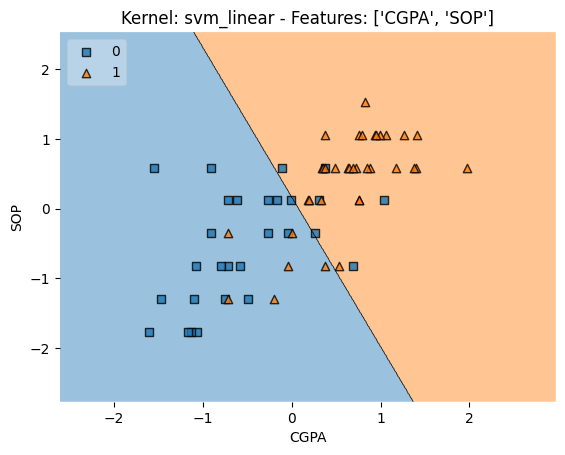

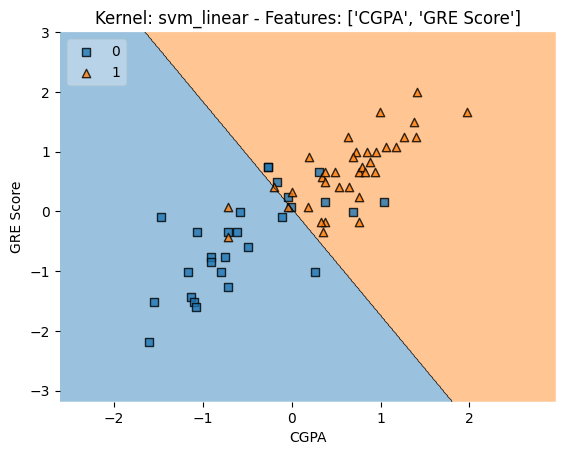

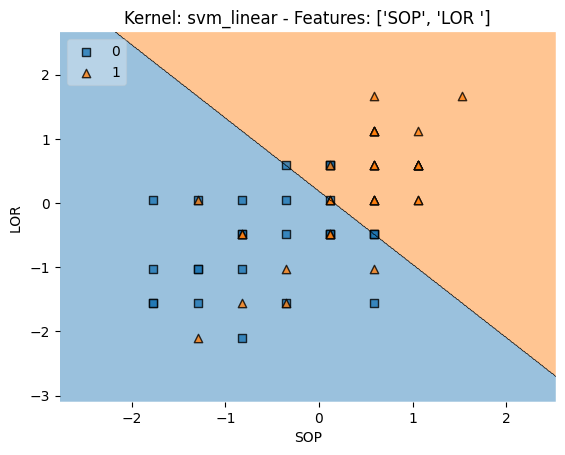

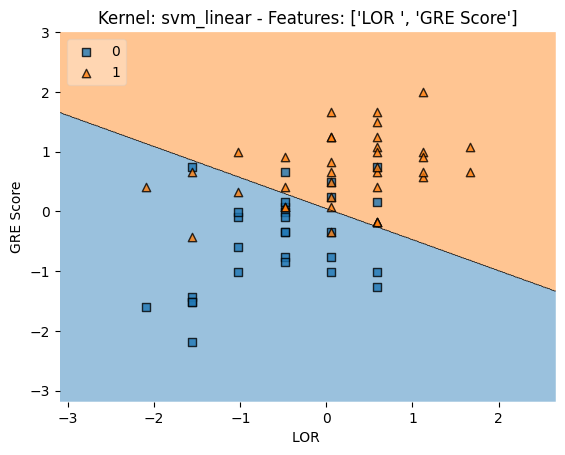

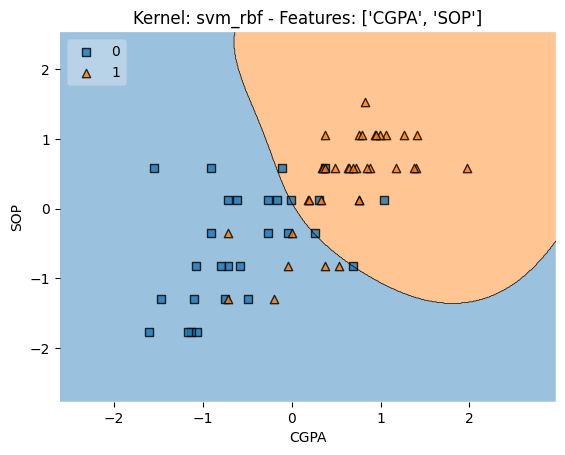

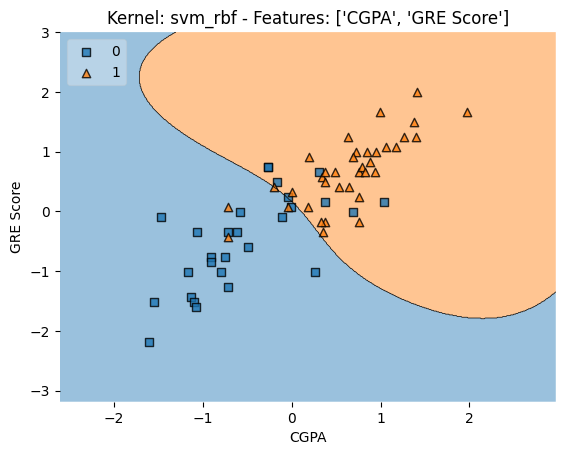

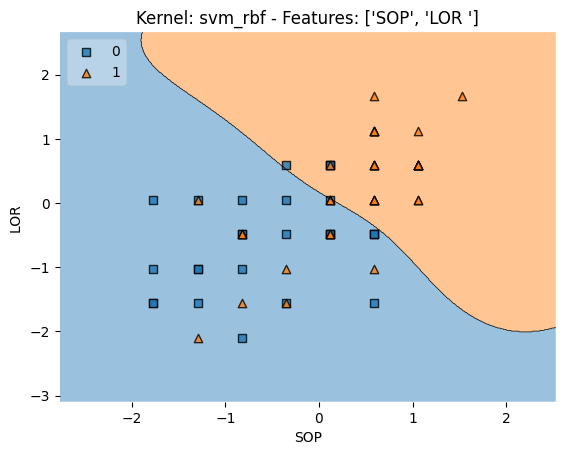

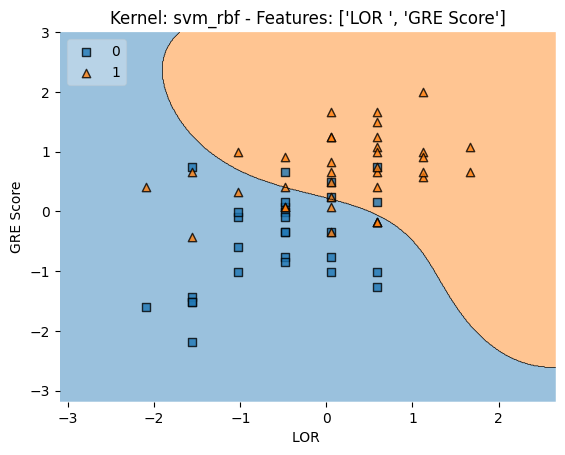

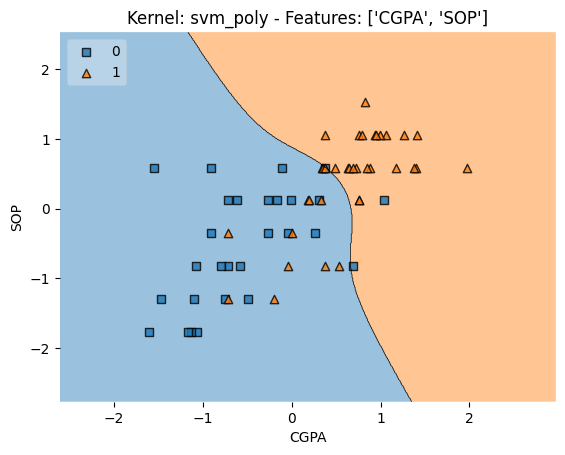

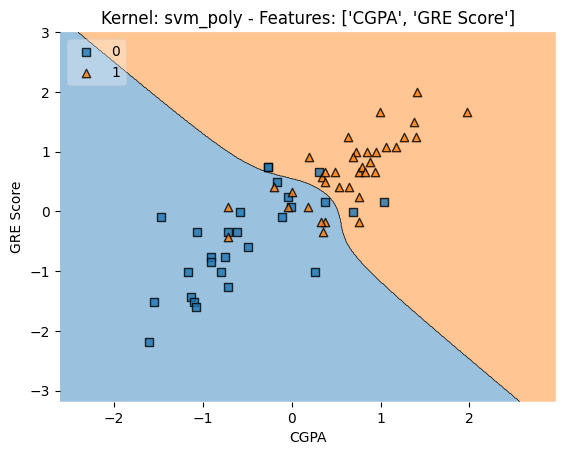

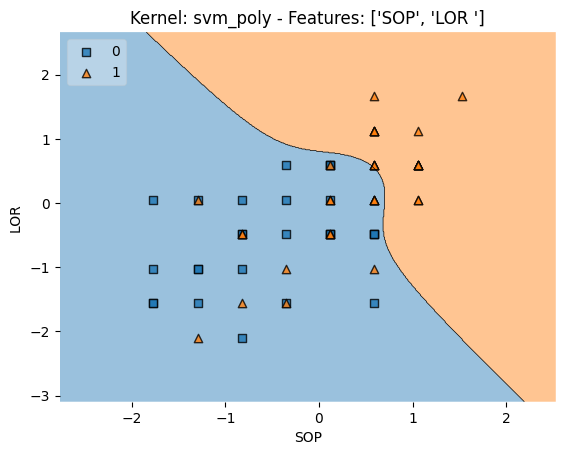

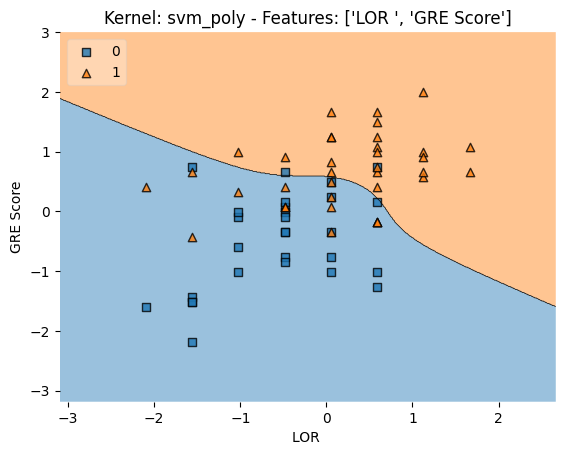

In [118]:
feature_comb = [
    ['CGPA', 'SOP'],
    ['CGPA', 'GRE Score'],
    ['SOP', 'LOR '],
    ['LOR ', 'GRE Score']
]

models = [svm_linear, svm_rbf, svm_poly]
sv = {}
acc = {}

# For each pair of model and feature combination pair
for model, model_name in zip(models, ['svm_linear', 'svm_rbf', 'svm_poly']):
  sv[model_name] = {}
  acc[model_name] = {}
  fc=1
  for feature in feature_comb:
    # Get column indexes for the pair of features
    columns = [X_train.columns.get_loc(x) for x in feature]
    # 2 columns of feature values
    X = X_train_n[: , columns]
    # Label values
    y = y_train.values.flatten()
    # Fit the model based on model type and feature pair
    model.fit(X, y)
    # Get the support vector points
    vec = model.support_vectors_
    # Get the number of support vector points
    svc = model.n_support_
    sv[model_name][fc] = [svc]
    sv[model_name][fc].append(vec)
    # Get the validation data features
    X_v = X_val_n[:, columns]
    # Label Values
    y_v = y_val.values.flatten()

    y_pred = model.predict(X_v)
    # Accuracy
    accuracy = accuracy_score(y_val.values.flatten(), y_pred)
    acc[model_name][fc] = accuracy
    fc+=1

    # Visualaize decision boundary
    plot_decision_regions(X_v, y_v, clf=model, legend=2)
    plt.xlabel(feature[0])
    plt.ylabel(feature[1])
    plt.title(f"Kernel: {model_name} - Features: {feature}")
    plt.show()

In [119]:
for i in sv:
  for j in range(1,5):
    print('For Kernal:', i, 'and feature combination:', feature_comb[j-1])
    print('Number of Support Vectores for Class 0 and 1:', sv[i][j][0])
    np_arr = np.array(sv[i][j][1])
    print('Support Vectors:')
    print(np_arr[:5, :5])

For Kernal: svm_linear and feature combination: ['CGPA', 'SOP']
Number of Support Vectores for Class 0 and 1: [44 43]
Support Vectors:
[[ 0.05401792  0.11593445]
 [-0.10566554 -0.35516426]
 [ 0.19773304  0.58703316]
 [ 0.26160642 -0.35516426]
 [ 0.11789131  1.52923059]]
For Kernal: svm_linear and feature combination: ['CGPA', 'GRE Score']
Number of Support Vectores for Class 0 and 1: [43 42]
Support Vectors:
[[ 0.05401792 -0.67856858]
 [-0.10566554  0.15900884]
 [ 0.19773304 -0.25977987]
 [ 0.26160642 -0.00850665]
 [ 0.11789131 -1.01359955]]
For Kernal: svm_linear and feature combination: ['SOP', 'LOR ']
Number of Support Vectores for Class 0 and 1: [58 57]
Support Vectors:
[[ 0.11593445 -0.48488447]
 [ 0.11593445 -1.02224562]
 [ 0.58703316  1.12719896]
 [-0.35516426  0.05247667]
 [ 1.52923059  0.58983782]]
For Kernal: svm_linear and feature combination: ['LOR ', 'GRE Score']
Number of Support Vectores for Class 0 and 1: [44 45]
Support Vectors:
[[-0.48488447  0.15900884]
 [ 1.12719896

SVM Linear with LOR GRE feature combination appears to produce the best results. The misclasssification is less and the margin looks good.

In [120]:
for i in acc:
  for j in range(1,5):
    print('For Kernal:', i, 'and feature combination:', feature_comb[j-1], 'accuray:', acc[i][j])

For Kernal: svm_linear and feature combination: ['CGPA', 'SOP'] accuray: 0.8125
For Kernal: svm_linear and feature combination: ['CGPA', 'GRE Score'] accuray: 0.796875
For Kernal: svm_linear and feature combination: ['SOP', 'LOR '] accuray: 0.734375
For Kernal: svm_linear and feature combination: ['LOR ', 'GRE Score'] accuray: 0.8125
For Kernal: svm_rbf and feature combination: ['CGPA', 'SOP'] accuray: 0.78125
For Kernal: svm_rbf and feature combination: ['CGPA', 'GRE Score'] accuray: 0.8125
For Kernal: svm_rbf and feature combination: ['SOP', 'LOR '] accuray: 0.75
For Kernal: svm_rbf and feature combination: ['LOR ', 'GRE Score'] accuray: 0.75
For Kernal: svm_poly and feature combination: ['CGPA', 'SOP'] accuray: 0.765625
For Kernal: svm_poly and feature combination: ['CGPA', 'GRE Score'] accuray: 0.78125
For Kernal: svm_poly and feature combination: ['SOP', 'LOR '] accuray: 0.734375
For Kernal: svm_poly and feature combination: ['LOR ', 'GRE Score'] accuray: 0.75


In [121]:
file_path = '/content/drive/MyDrive/data_test-2.csv'

# Read the CSV file using pandas
test_df = pd.read_csv(file_path, index_col=0)

print(test_df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         328        295          101                  2  2.5   2.0  7.86   
1         325        315          104                  3  3.0   2.5  8.33   
2         191        324          111                  5  4.5   4.0  9.16   
3          49        321          110                  3  3.5   5.0  8.85   
4         180        307          102                  3  3.0   3.0  8.27   

   Research  
0         0  
1         0  
2         1  
3         1  
4         0  


In [122]:
columns_to_drop = ['Serial No.']
test_df = test_df.drop(columns=columns_to_drop)
print(test_df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        295          101                  2  2.5   2.0  7.86         0
1        315          104                  3  3.0   2.5  8.33         0
2        324          111                  5  4.5   4.0  9.16         1
3        321          110                  3  3.5   5.0  8.85         1
4        307          102                  3  3.0   3.0  8.27         0


In [123]:
X_test_n = scaler.transform(test_df)

In [124]:
columns = [ test_df.columns.get_loc(x) for x in ['LOR ', 'GRE Score']]

X = X_test_n[: , columns]

y_pred = svm_linear.predict(X)

In [125]:
# Add the 2 predicted outputs to CSV
import csv

data = zip(y_pred)

csv_filename = '/content/drive/MyDrive/Pavan Santosh_Nippani Ravi_preds.csv'

fieldnames = ['pred_svm']

# Write data to CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for row in data:
        writer.writerow({fieldnames[0]: row[0]})

print(f"CSV file '{csv_filename}' has been created successfully.")

CSV file '/content/drive/MyDrive/Pavan Santosh_Nippani Ravi_preds.csv' has been created successfully.
